# 1. Autocorrelation

'babies.zip` contains baby name frequencies per year (one file per year). You can treat each baby name as a time series.

1. Get the autocorrelation and partial autocorrelation for the names `Olivia`, `Newton` and `John`.

2. Which name do you expect to be the most popular in 2022? Use an ARIMA model and backtesting to pick 3 interesting candidates. Support your findings with a plot

In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')
from statsmodels.tsa.stattools import acovf,acf,pacf,pacf_yw, pacf_ols
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

from statsmodels.tsa.arima_model import ARMA, ARIMA, ARMAResults, ARIMAResults
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.statespace.tools import diff

In [3]:
def adf_test(series,title=''):
    print(f'ADF Test:{title}')
    result= adfuller(series.dropna(),autolag='AIC')
    labels = ['ADF test statistics','p-value','# lag used', '# observation']
    out = pd.Series(result[0:4],index = labels)
    
    for key,val in result[4].items():
        out[f'critical value ({key})'] = val
        
    print(out.to_string())
    
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis")
        print("Reject the null hypothesis")
        print("Data has no unit root and is stationary")
    else:
        print("Weak evidence against the null hypothesis")
        print("Fail to reject the null hypothesis")
        print("Data has a unit root and is non-stationary")

In [4]:
files = [file for file in os.listdir('./data')
         if file.startswith('yob')]

In [5]:
list_of_df = []

for file in files:
    df = pd.read_csv('./data/'+file,sep=",", header=None)
    df.columns = ['Name', 'Gender','Total']
    df['year'] = file[3:7]
    
    list_of_df.append(df)

In [6]:
full_df = pd.concat(list_of_df,ignore_index=True)

In [7]:
full_df['month'] = 12
full_df['day'] = 31

full_df['myDt']=pd.to_datetime(full_df[['year','month','day']])
full_df.drop(['year','month','day'],axis = 1,inplace=True)
full_df.set_index('myDt',inplace=True)

In [8]:
full_df

,Name,Gender,Total
myDt,,,
1880-12-31,Mary,F,7065
1880-12-31,Anna,F,2604
1880-12-31,Emma,F,2003
1880-12-31,Elizabeth,F,1939
1880-12-31,Minnie,F,1746
...,...,...,...
2016-12-31,Zolton,M,5
2016-12-31,Zurich,M,5
2016-12-31,Zyahir,M,5


In [9]:
def new_df(df,name):
    df_name = df[df['Name'] == name]
    
    f = pd.DataFrame(df_name[df_name['Gender'] =='F'])
    f.drop(['Name','Gender'],axis=1,inplace=True)
    plot_acf(f,lags = 40);
    plot_pacf(f,lags = 40);
    
    m = pd.DataFrame(df_name[df_name['Gender'] =='M'])
    m.drop(['Name','Gender'],axis=1,inplace=True)
    plot_acf(m,lags = 40);
    plot_pacf(m,lags = 40);

In [10]:
def new_dfm(df,name):
    df_name = df[df['Name'] == name]
    m = pd.DataFrame(df_name[df_name['Gender'] =='M'])
    m.drop(['Name','Gender'],axis=1,inplace=True)
    plot_acf(m,lags = 40);
    plot_pacf(m,lags = 40);

In [11]:
def new_dff(df,name):
    df_name = df[df['Name'] == name]
    f = pd.DataFrame(df_name[df_name['Gender'] =='F'])
    f.drop(['Name','Gender'],axis=1,inplace=True)
    plot_acf(f,lags = 40);
    plot_pacf(f,lags = 40);

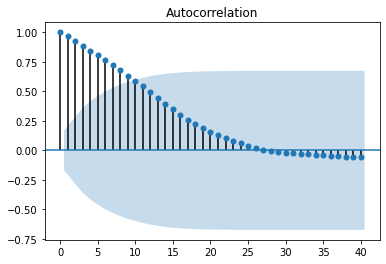

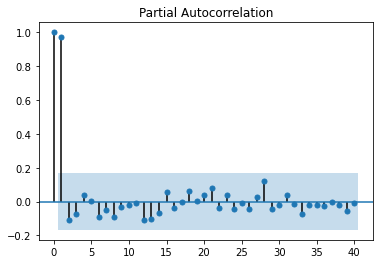

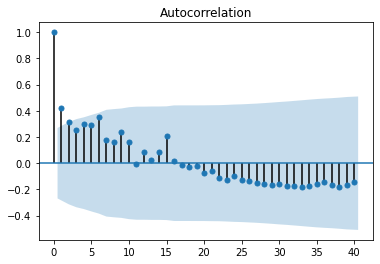

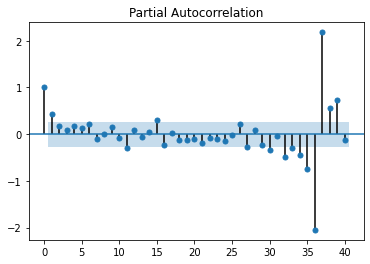

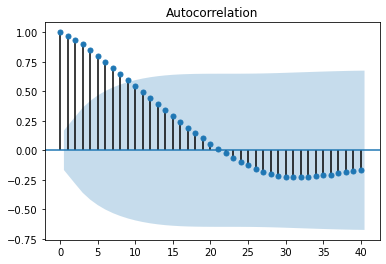

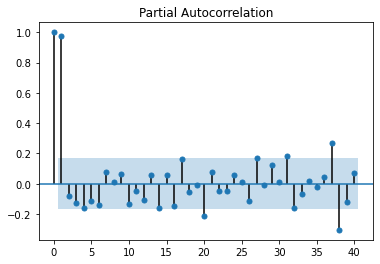

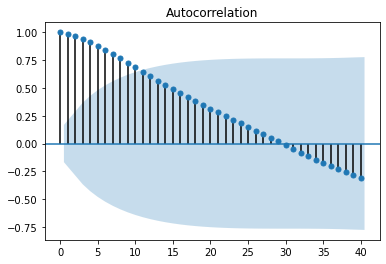

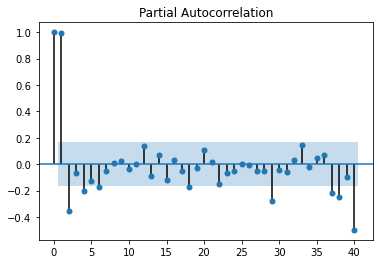

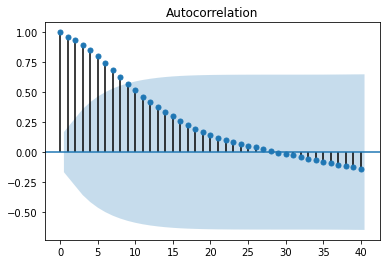

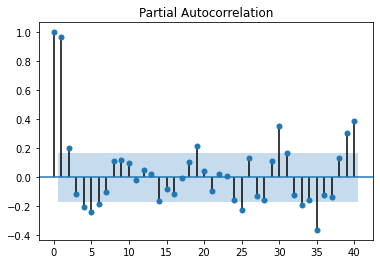

In [12]:
new_df(full_df,'Olivia')
new_df(full_df,'John')
new_dfm(full_df,'Newton')

 # Liam

In [13]:
after1990 = pd.DataFrame(full_df.loc['1990-12-31':])

In [14]:
female_name = after1990[after1990['Gender'] == 'F']
male_name = after1990[after1990['Gender'] == 'M']

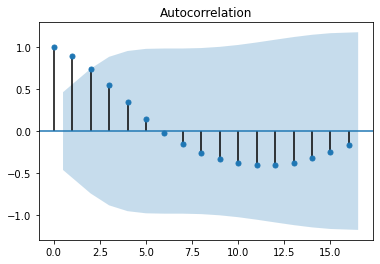

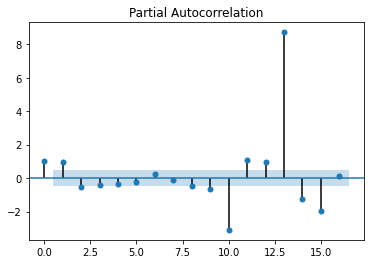

In [15]:
after1999 = pd.DataFrame(full_df.loc['1999-12-31':])
liam = after1999[(after1999['Name'] == 'Liam') & (after1999['Gender']=='M')]
liam.drop(['Name','Gender'],axis=1,inplace=True)
plot_acf(liam,lags = 16);
plot_pacf(liam,lags = 16);

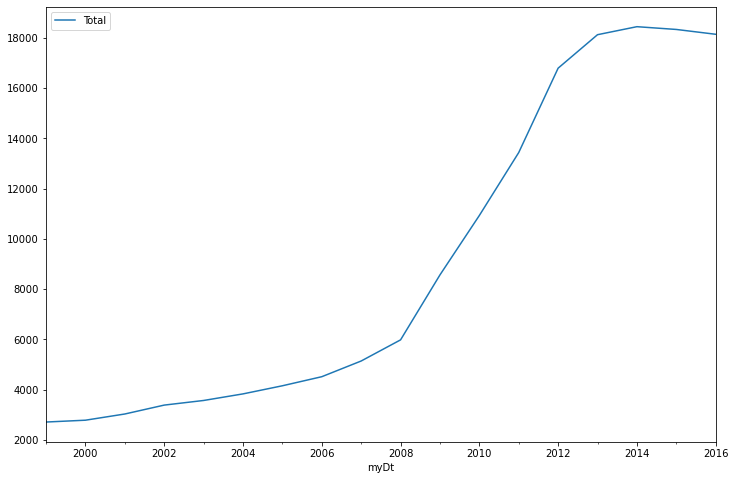

In [16]:
liam['Total'].plot(legend=True,figsize=(12,8))

In [17]:
adf_test(liam['Total'])

ADF Test:
ADF test statistics      1.012999
p-value                  0.994401
# lag used               7.000000
# observation           10.000000
critical value (1%)     -4.331573
critical value (5%)     -3.232950
critical value (10%)    -2.748700
Weak evidence against the null hypothesis
Fail to reject the null hypothesis
Data has a unit root and is non-stationary


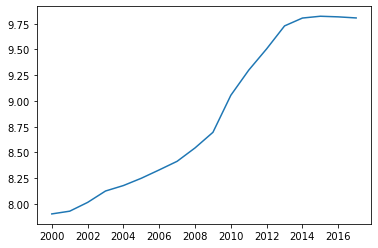

In [18]:
liam_ts_log = np.log(liam)
plt.plot(liam_ts_log)

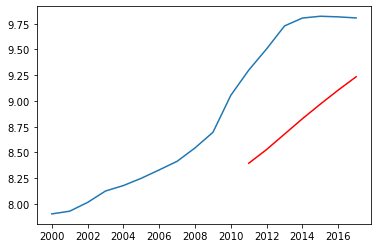

In [19]:
liam_ts_smooth = liam_ts_log.rolling(window = 12).mean()
plt.plot(liam_ts_smooth, color = 'red')
plt.plot(liam_ts_log)
plt.show()

In [20]:
# Case 1: No subtraction
liam_no_sub_ts = liam_ts_smooth
liam_no_sub_ts.dropna(inplace = True)

# Case 2: Yes subtraction
liam_sub_ts = liam_ts_log - liam_ts_smooth
liam_sub_ts.dropna(inplace = True)

In [21]:
adf_test(liam_no_sub_ts)
adf_test(liam_sub_ts)

ADF Test:
ADF test statistics    -1.371987e+01
p-value                 1.193496e-25
# lag used              1.000000e+00
# observation           5.000000e+00
critical value (1%)    -6.045114e+00
critical value (5%)    -3.929280e+00
critical value (10%)   -2.986810e+00
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary
ADF Test:
ADF test statistics    -0.905716
p-value                 0.786084
# lag used              1.000000
# observation           5.000000
critical value (1%)    -6.045114
critical value (5%)    -3.929280
critical value (10%)   -2.986810
Weak evidence against the null hypothesis
Fail to reject the null hypothesis
Data has a unit root and is non-stationary


In [22]:
len(liam)

18

In [23]:
liam_train = liam.iloc[:14]
liam_test = liam.iloc[14:]

In [24]:
liam_model = ARIMA(liam_train['Total'],order=(0,1,1))
liam_results = liam_model.fit()
liam_results.summary()

C:\Users\pchiu\Documents\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency A-DEC will be used.
  warnings.warn('No frequency information was'
C:\Users\pchiu\Documents\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency A-DEC will be used.
  warnings.warn('No frequency information was'


<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.Total   No. Observations:                   13
Model:                 ARIMA(0, 1, 1)   Log Likelihood                -105.226
Method:                       css-mle   S.D. of innovations            753.946
Date:                Sun, 25 Apr 2021   AIC                            216.452
Time:                        19:29:39   BIC                            218.146
Sample:                    12-31-2000   HQIC                           216.103
                         - 12-31-2012                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const          1103.8352    376.553      2.931      0.003     365.806    1841.865
ma.L1.D.Total     0.8550      0.240      3.560      0.000       0.384       1.326
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1           -1.1695           +0.0000j            1.1695            0.5000
-----------------------------------------------------------------------------
"""

In [25]:
start = len(liam_train)
end=len(liam_train)+len(liam_test)+5
liam_prediction = liam_results.predict(start=start,end=end,typ='levels')

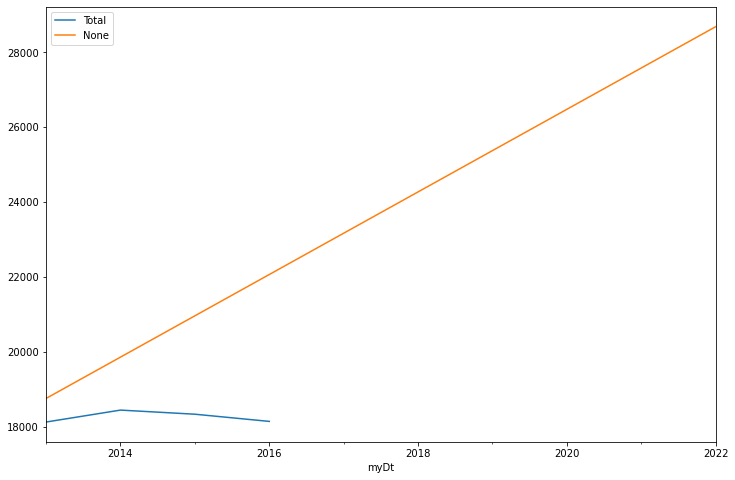

In [26]:
liam_test['Total'].plot(legend=True,figsize=(12,8))
liam_prediction.plot(legend=True,figsize=(12,8))

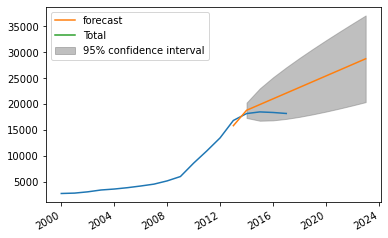

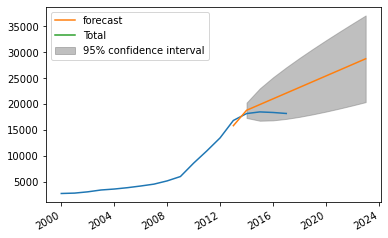

In [27]:
fig, ax = plt.subplots()
ax.plot(liam)
liam_results.plot_predict('2012', '2022', ax=ax)

# Noah

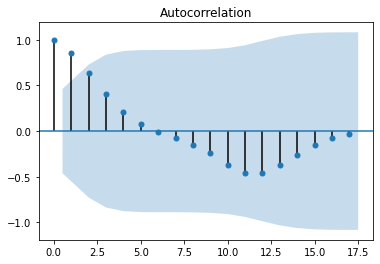

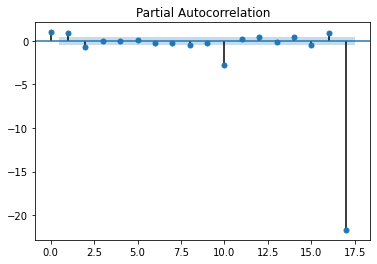

In [28]:
after1999 = pd.DataFrame(full_df.loc['1999-12-31':])
noah = after1999[(after1999['Name'] == 'Noah') & (after1999['Gender']=='M')]
noah.drop(['Name','Gender'],axis=1,inplace=True)
plot_acf(noah,lags = 17);
plot_pacf(noah,lags = 17);

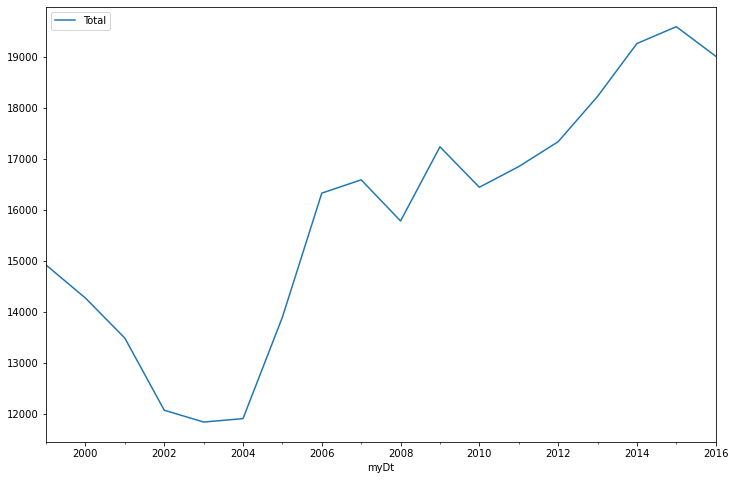

In [29]:
noah['Total'].plot(legend=True,figsize=(12,8))

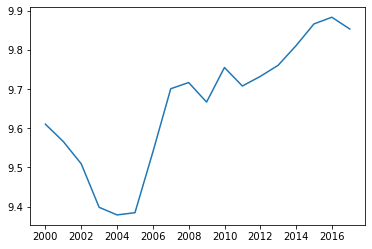

In [30]:
noah_ts_log = np.log(noah)
plt.plot(noah_ts_log)

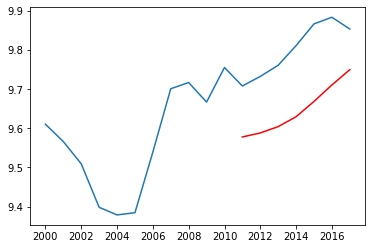

In [31]:
noah_ts_smooth = noah_ts_log.rolling(window = 12).mean()
plt.plot(noah_ts_smooth, color = 'red')
plt.plot(noah_ts_log)
plt.show()

In [32]:
# Case 1: No subtraction
noah_no_sub_ts = noah_ts_smooth
noah_no_sub_ts.dropna(inplace = True)

noah_sub_ts = noah_ts_log - noah_ts_smooth
noah_sub_ts.dropna(inplace = True)

In [33]:
adf_test(noah_no_sub_ts)
adf_test(noah_sub_ts)

ADF Test:
ADF test statistics    -1.186876
p-value                 0.679216
# lag used              1.000000
# observation           5.000000
critical value (1%)    -6.045114
critical value (5%)    -3.929280
critical value (10%)   -2.986810
Weak evidence against the null hypothesis
Fail to reject the null hypothesis
Data has a unit root and is non-stationary
ADF Test:
ADF test statistics    -2.476618
p-value                 0.121267
# lag used              1.000000
# observation           5.000000
critical value (1%)    -6.045114
critical value (5%)    -3.929280
critical value (10%)   -2.986810
Weak evidence against the null hypothesis
Fail to reject the null hypothesis
Data has a unit root and is non-stationary


In [34]:
noah_train = noah.iloc[:14]
noah_test = noah.iloc[14:]

In [35]:
len(noah)

18

In [36]:
noah_model = ARIMA(noah_train['Total'],order=(2,2,0))
noah_results = noah_model.fit()
noah_results.summary()

C:\Users\pchiu\Documents\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency A-DEC will be used.
  warnings.warn('No frequency information was'
C:\Users\pchiu\Documents\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency A-DEC will be used.
  warnings.warn('No frequency information was'


<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:               D2.Total   No. Observations:                   12
Model:                 ARIMA(2, 2, 0)   Log Likelihood                -102.832
Method:                       css-mle   S.D. of innovations           1262.577
Date:                Sun, 25 Apr 2021   AIC                            213.663
Time:                        19:29:44   BIC                            215.603
Sample:                    12-31-2001   HQIC                           212.945
                         - 12-31-2012                                         
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             98.3220    233.350      0.421      0.674    -359.036     555.680
ar.L1.D2.Total    -0.3969      0.272     -1.458      0.145      -0.930       0.137
ar.L2.D2.Total    -0.2399      0.267     -0.899      0.369      -0.763       0.283
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -0.8273           -1.8665j            2.0417           -0.3164
AR.2           -0.8273           +1.8665j            2.0417            0.3164
-----------------------------------------------------------------------------
"""

In [37]:
start = len(noah_train)
end=len(noah_train)+len(noah_test)+5
noah_prediction = noah_results.predict(start=start,end=end,typ='levels')

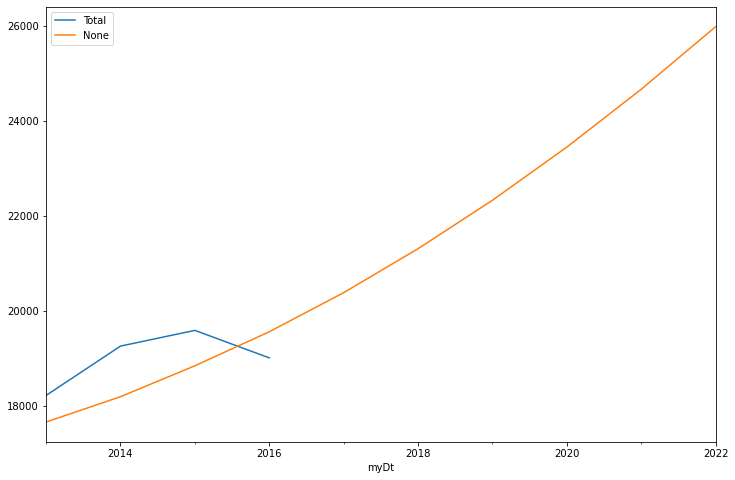

In [38]:
noah_test['Total'].plot(legend=True,figsize=(12,8))
noah_prediction.plot(legend=True,figsize=(12,8))

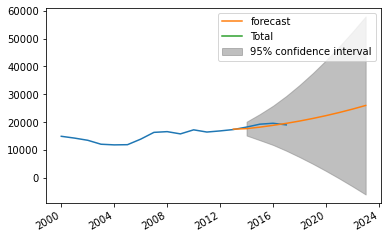

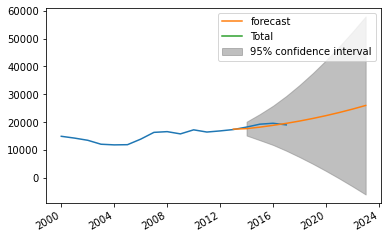

In [39]:
fig, ax = plt.subplots()
ax.plot(noah)
noah_results.plot_predict('2012', '2022', ax=ax)

# Oliver

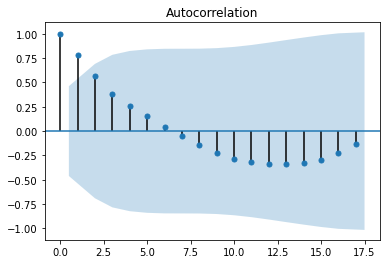

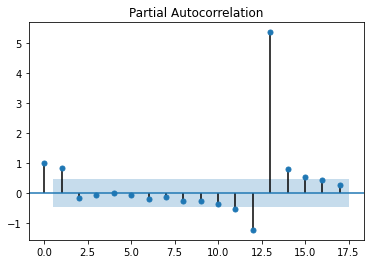

In [40]:
after1999 = pd.DataFrame(full_df.loc['1999-12-31':])
oliver = after1999[(after1999['Name'] == 'Oliver') & (after1999['Gender']=='M')]
oliver.drop(['Name','Gender'],axis=1,inplace=True)
plot_acf(oliver,lags = 17);
plot_pacf(oliver,lags = 17);

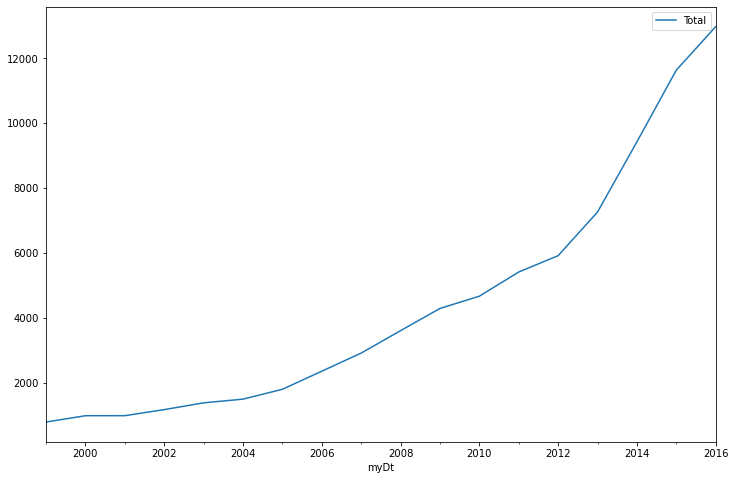

In [41]:
oliver['Total'].plot(legend=True,figsize=(12,8))

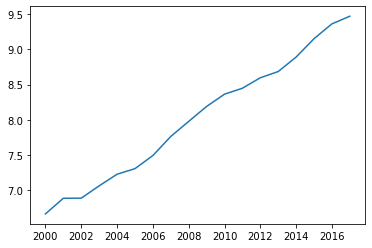

In [42]:
oliver_ts_log = np.log(oliver)
plt.plot(oliver_ts_log)

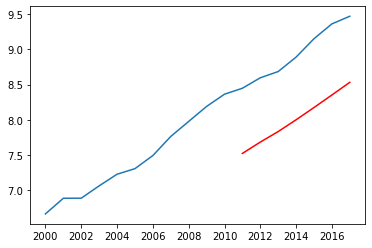

In [43]:
oliverh_ts_smooth = oliver_ts_log.rolling(window = 12).mean()
plt.plot(oliverh_ts_smooth, color = 'red')
plt.plot(oliver_ts_log)
plt.show()

In [44]:
# Case 1: No subtraction
oliver_no_sub_ts = oliverh_ts_smooth
oliver_no_sub_ts.dropna(inplace = True)

oliver_sub_ts = oliver_ts_log - oliverh_ts_smooth
oliver_sub_ts.dropna(inplace = True)

In [45]:
adf_test(oliver_no_sub_ts)
adf_test(oliver_sub_ts)

ADF Test:
ADF test statistics     3.263311
p-value                 1.000000
# lag used              1.000000
# observation           5.000000
critical value (1%)    -6.045114
critical value (5%)    -3.929280
critical value (10%)   -2.986810
Weak evidence against the null hypothesis
Fail to reject the null hypothesis
Data has a unit root and is non-stationary
ADF Test:
ADF test statistics    -2.964516
p-value                 0.038344
# lag used              1.000000
# observation           5.000000
critical value (1%)    -6.045114
critical value (5%)    -3.929280
critical value (10%)   -2.986810
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


In [46]:
oliver_train = oliver.iloc[:14]
oliver_test = oliver.iloc[14:]

In [47]:
oliver_model = ARIMA(oliver_train['Total'],order=(1,1,0))
oliver_results = oliver_model.fit()
oliver_results.summary()

C:\Users\pchiu\Documents\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency A-DEC will be used.
  warnings.warn('No frequency information was'
C:\Users\pchiu\Documents\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency A-DEC will be used.
  warnings.warn('No frequency information was'


<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.Total   No. Observations:                   13
Model:                 ARIMA(1, 1, 0)   Log Likelihood                 -86.158
Method:                       css-mle   S.D. of innovations            179.392
Date:                Sun, 25 Apr 2021   AIC                            178.317
Time:                        19:29:49   BIC                            180.012
Sample:                    12-31-2000   HQIC                           177.968
                         - 12-31-2012                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const           385.4698    118.540      3.252      0.001     153.137     617.803
ar.L1.D.Total     0.6250      0.203      3.086      0.002       0.228       1.022
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.6000           +0.0000j            1.6000            0.0000
-----------------------------------------------------------------------------
"""

In [48]:
start = len(oliver_train)
end=len(oliver_train)+len(oliver_test)+5
oliver_prediction = oliver_results.predict(start=start,end=end,typ='levels')

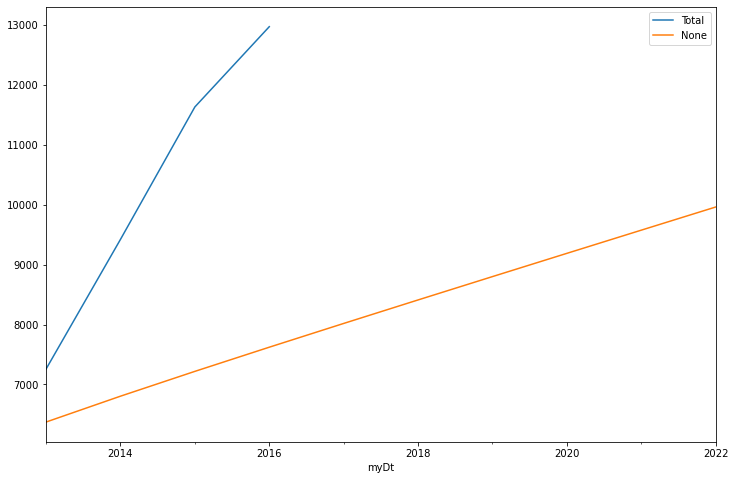

In [49]:
oliver_test['Total'].plot(legend=True,figsize=(12,8))
oliver_prediction.plot(legend=True,figsize=(12,8))

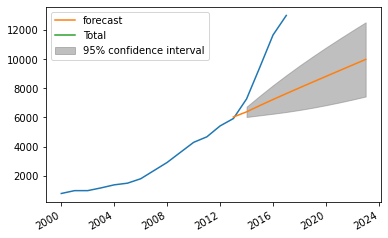

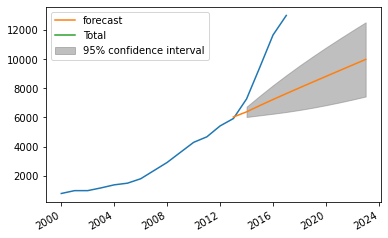

In [50]:
fig, ax = plt.subplots()
ax.plot(oliver)
oliver_results.plot_predict('2012', '2022', ax=ax)

# 2. Counterfactual prediction testing

The [FRED](https://fred.stlouisfed.org) database has economic data useful for this question.

A common method to test the effect of a one-off event is to fit an ARIMA model up to the event, and compare the forecast to the actual data of what happened, then measure the gap between the forecast and the event data.

1. Use GDP and unemployment data with the Counterfactual prediction testing methodology to get an estimate of the magnitude of COVID (around March 2020 as a cutoff date) on these two statistics. Use an ARIMA model which fits best to the pre-COVID time series and compare the output of both. Provide a visualization.

2. Is GDP a unit root process or trend stationary? Use the 2008 and 2020 GDP shocks and statistical tests we've seen in class to provide an argument (it's possible event one says one thing and the other event says the opposite).

In [51]:
from statsmodels.tsa.arima_model import ARMA, ARIMA, ARMAResults, ARIMAResults
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.statespace.tools import diff

In [52]:
gdpdf = pd.read_csv('data/GDP.csv',index_col='DATE',parse_dates=True)
gdpdf.index.freq = 'QS'

In [53]:
unemp = pd.read_csv('data/UNRATE.csv',index_col='DATE',parse_dates=True)
unemp.index.freq = 'MS'

In [54]:
gdpdf.head()

,GDP
DATE,
1947-01-01,243.164
1947-04-01,245.968
1947-07-01,249.585
1947-10-01,259.745
1948-01-01,265.742


In [55]:
unemp.head()

,UNRATE
DATE,
1948-01-01,3.4
1948-02-01,3.8
1948-03-01,4.0
1948-04-01,3.9
1948-05-01,3.5


In [56]:
gdpdf_1 = pd.DataFrame(gdpdf.loc['1999-01-01':])

In [57]:
unemp_1 = pd.DataFrame(unemp.loc['1999-01-01':])

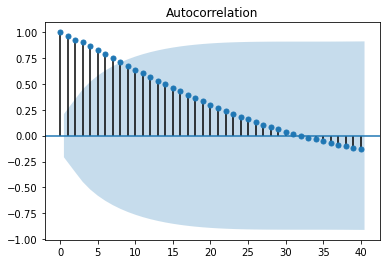

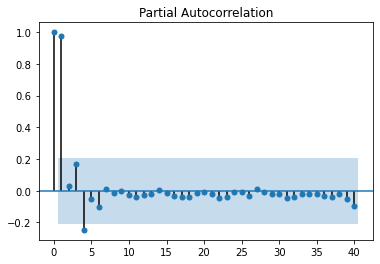

In [58]:
plot_acf(gdpdf_1['GDP'],lags=40);
plot_pacf(gdpdf_1['GDP'],lags=40);

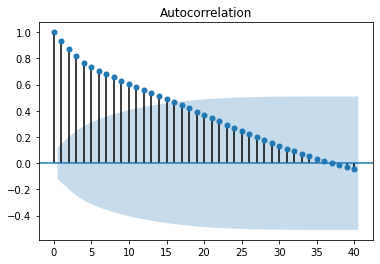

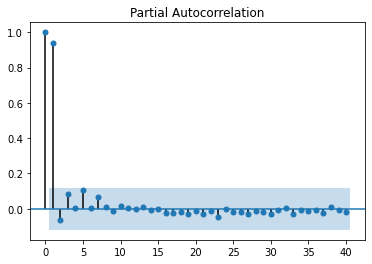

In [59]:
plot_acf(unemp_1['UNRATE'],lags=40);
plot_pacf(unemp_1['UNRATE'],lags=40);

In [60]:
gdpdf_1['Diff_1'] = diff(gdpdf_1['GDP'],k_diff=1)

In [61]:
unemp_1['Diff_1'] = diff(unemp_1['UNRATE'],k_diff=1)

In [62]:
adf_test(gdpdf_1['Diff_1'])

ADF Test:
ADF test statistics    -8.014537e+00
p-value                 2.156505e-12
# lag used              1.000000e+00
# observation           8.500000e+01
critical value (1%)    -3.509736e+00
critical value (5%)    -2.896195e+00
critical value (10%)   -2.585258e+00
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


In [63]:
adf_test(unemp_1['Diff_1'])

ADF Test:
ADF test statistics    -9.779685e+00
p-value                 6.785643e-17
# lag used              3.000000e+00
# observation           2.620000e+02
critical value (1%)    -3.455558e+00
critical value (5%)    -2.872636e+00
critical value (10%)   -2.572683e+00
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


In [64]:
print(len(gdpdf_1))
print(len(unemp_1))

88
267


In [65]:
gdp_train = gdpdf_1.iloc[:78]
gdp_test = gdpdf_1.iloc[77:]

In [66]:
unemp_train = unemp_1.iloc[:254]
unemp_test = unemp_1.iloc[253:]

In [67]:
gdp_model = ARIMA(gdp_train['GDP'],order=(1,1,0))
gdp_results = gdp_model.fit()
gdp_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                  D.GDP   No. Observations:                   77
Model:                 ARIMA(1, 1, 0)   Log Likelihood                -453.902
Method:                       css-mle   S.D. of innovations             87.735
Date:                Sun, 25 Apr 2021   AIC                            913.805
Time:                        19:30:04   BIC                            920.836
Sample:                    04-01-1999   HQIC                           916.617
                         - 04-01-2018                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const         146.0257     18.463      7.909      0.000     109.840     182.212
ar.L1.D.GDP     0.4642      0.102      4.548      0.000       0.264       0.664
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            2.1543           +0.0000j            2.1543            0.0000
-----------------------------------------------------------------------------
"""

In [68]:
unemp_model = ARIMA(unemp_train['UNRATE'],order=(1,1,1))
unemp_results = unemp_model.fit()
unemp_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:               D.UNRATE   No. Observations:                  253
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 130.685
Method:                       css-mle   S.D. of innovations              0.144
Date:                Sun, 25 Apr 2021   AIC                           -253.370
Time:                        19:30:05   BIC                           -239.237
Sample:                    02-01-1999   HQIC                          -247.684
                         - 02-01-2020                                         
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.0044      0.030     -0.147      0.883      -0.063       0.054
ar.L1.D.UNRATE     0.9423      0.028     33.257      0.000       0.887       0.998
ma.L1.D.UNRATE    -0.8002      0.045    -17.666      0.000      -0.889      -0.711
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0612           +0.0000j            1.0612            0.0000
MA.1            1.2496           +0.0000j            1.2496            0.0000
-----------------------------------------------------------------------------
"""

In [69]:
unemp_start = len(unemp_train)
unemp_end=len(unemp_train)+len(unemp_test)-1
unemp_prediction = unemp_results.predict(start=unemp_start,end=unemp_end,typ='levels')

In [70]:
gdp_start = len(gdp_train)
gdp_end=len(gdp_train)+len(gdp_test)-1
gdp_prediction = gdp_results.predict(start=gdp_start,end=gdp_end,typ='levels')

In [71]:
unemp_prediction

2020-03-01    3.482689
2020-04-01    3.466123
2020-05-01    3.450258
2020-06-01    3.435055
2020-07-01    3.420475
2020-08-01    3.406482
2020-09-01    3.393042
2020-10-01    3.380124
2020-11-01    3.367697
2020-12-01    3.355734
2021-01-01    3.344206
2021-02-01    3.333090
2021-03-01    3.322361
2021-04-01    3.311998
Freq: MS, dtype: float64

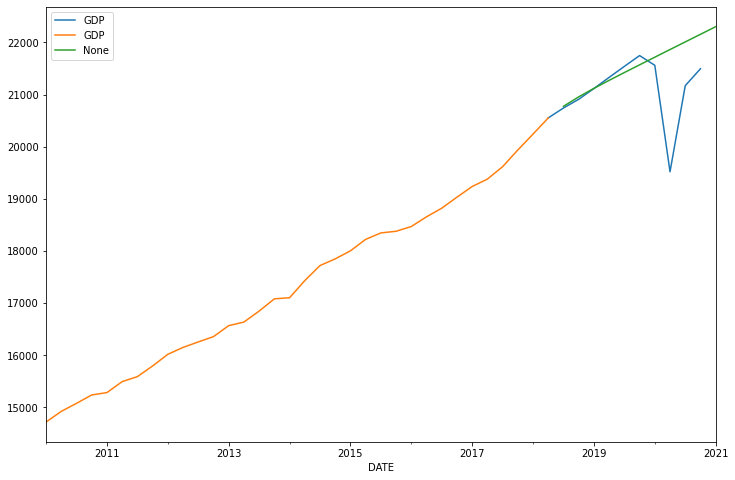

In [72]:
gdp_test['GDP'].plot(legend=True,figsize=(12,8))
gdp_train['GDP']['2010-01-01':].plot(legend=True,figsize=(12,8))
gdp_prediction.plot(legend=True,figsize=(12,8))

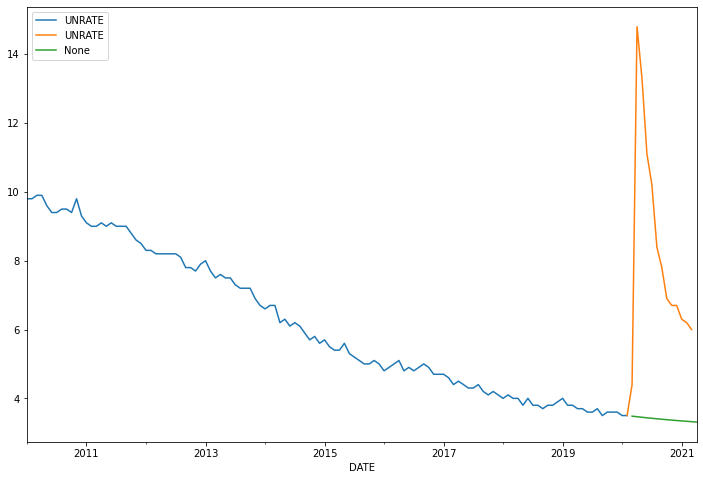

In [73]:
unemp_train['UNRATE']['2010-01-01':].plot(legend=True,figsize=(12,8))
unemp_test['UNRATE'].plot(legend=True,figsize=(12,8))
unemp_prediction.plot(legend=True,figsize=(12,8))

In [74]:
financialCrash2008 = pd.DataFrame(gdpdf['GDP'].loc['1999-01-01':'2009-01-01'])
adf_test(financialCrash2008['GDP'])

ADF Test:
ADF test statistics     -1.631356
p-value                  0.466781
# lag used               5.000000
# observation           35.000000
critical value (1%)     -3.632743
critical value (5%)     -2.948510
critical value (10%)    -2.613017
Weak evidence against the null hypothesis
Fail to reject the null hypothesis
Data has a unit root and is non-stationary


In [75]:
covid2020 = pd.DataFrame(gdpdf['GDP'].loc['2010-01-01':])
adf_test(covid2020['GDP'])

ADF Test:
ADF test statistics     -1.019908
p-value                  0.745934
# lag used               2.000000
# observation           41.000000
critical value (1%)     -3.600983
critical value (5%)     -2.935135
critical value (10%)    -2.605963
Weak evidence against the null hypothesis
Fail to reject the null hypothesis
Data has a unit root and is non-stationary
